## Proyecto 4 KickOff - Sistema de Recomendación

Un Sistema de Recomendación es un programa o software que crea recomendaciones de productos, servicios, información o contenido a los usuarios, basado en sus preferencias y comportamientos previos (visitar, comprar, dar like, ...)
- Netflix usa sistemas de referencia para recomendar películas o programas de televisión para usuarios individuales que probablemente los vean. 
- Amazon usa sistemas de recomendación para predecir y mostrar una lista de productos que es probable que el cliente compre. 
- Pandora usa sistemas de recomendación de música para sus oyentes.
![](netflix.jpg)

Algunos datos reales: En Netflix se recomiendan 2/3 de las películas vistas. En Google, las recomendaciones de noticias mejoraron la tasa de clics (CTR) en un 38%. Para Amazon, el 35% de las ventas provienen de recomendaciones.
Mediante análisis de datos y aprendizaje automático el sistema determina qué productos (items) son más relevantes para un usuario en particular y recomendarlos en consecuencia.

Hay principalmente 3 tipos de sistemas de recomendación:
1. los basados en contenido (**Content-based**), que utilizan la descripción/atributos de los productos para hacer recomendaciones por su similitud.
![](Content-based-filtering-vs-Collaborative-filtering-Source.png)
2. los sistemas de filtrado colaborativo por usuario (**User-based collaborative filtering**), que buscan usuarios similares (en su cesta de compra) y listan sus items preferidos (comprados).
3. los sistemas de filtrado colaborativo por producto (**Item-Based Collaborative Filtering**), que buscan productos similares (en su historial de compradores).
![](itemVSuser.jpg)
Los sistemas de recomendación se utilizan en sitios web de comercio electrónico (Amazon) y en plataformas de entretenimiento en línea (YouTube) y redes sociales (Instagram). Su objetivo es hacer fácil al usuario encontrar lo que más le puede interesar.

Ejercicio:
![image.png](attachment:image.png)

***
Model-based
En realidad, hay un dos tipos más de sistemas de recomendación que se usan menos y son más difíciles de implementar: híbridos y model-based:
- La falta de diversidad en las recomendaciones se resuelve mediante sistemas **híbridos** (collaborative filtering + content-based) que suman las recomendaciones de los dos sistemas.
- En los **sistemas de recomendación model-based**, el modelo matemático se entrena con datos históricos de interacciones de los usuarios con los elementos para encontrar patrones y relaciones entre ellos. Estos sistemas son capaces de manejar grandes conjuntos de datos y hacer recomendaciones personalizadas para usuarios individuales en función de sus preferencias y comportamientos pasados, **sin tener en cuenta la existencia de otros productos y de otros usuarios de la plataforma**.
![](model-hybrid.png)
***
Proyecto 4
La empresa XYZ se dedica a la fabricación y venta en línea de productos para regalos en cualquier ocasión. Está buscando un Data Scientist para implementar un plan estratégico con el que impulsar las ventas entre sus clientes actuales. En el proceso de selección del que tú eres un candidato, se propone la siguiente prueba técnica: Desarrollar un análisis estadístico para identificar los clientes más potenciales, los productos más consumidos y los meses de mayor frecuencia de compra. Construir un sistema de recomendación de productos según el historial del cliente. Y crear un modelo de detección de bundles.

Objetivos (Especificaciones del desarrollo)
1. Informe de contexto del dataset: productos más vendidos, países con más ventas, horarios pico, etc.
2. Representar gráficamente productos y beneficios por compra.
![](scatter-ventas.png)

2. Obtener 10 productos recomendados (con su descripción) para los usuarios de una plataforma de comercio electrónico.
3. Obtener recomendaciones de **bundles** definidos por los patrones de compra de los usuarios.

DataSet: Disponemos del fichero OnlineRetail.csv (datos anonimizados) que contiene las compras realizadas por los usuarios, así como los parámetros esenciales del producto adquirido.

Hints: Explorar los datos y realizar **limpieza de registros incompletos**. Visualizar valores faltantes con la librería **missingno**
![](graph-missingno.png)

In [1]:
# Importar librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Matplotlib usa todo el ancho de pantalla:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import seaborn as sns
from math import sqrt
import geopandas as gpd
from dateutil.parser import parse 

In [2]:
# Cargar dataset
df = pd.read_csv('OnlineRetail.csv',  encoding='ISO-8859-1')

In [ ]:
df.shape

In [ ]:
df.count()

In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
# Verificamos si hay valores faltantes
df.isnull().sum()

In [ ]:
df_sin_especificar = df.loc[(df['Country'] != "Unspecified")] 
df_sin_especificar.to_csv('sin_especificar.csv', index=False)

df_UK = df_sin_especificar .loc[(df_sin_especificar ['Country'] == "United Kingdom")] 
df_UK.to_csv('UK.csv', index=False)

df_otros_paises = df_sin_especificar.loc[(df_sin_especificar['Country'] != "United Kingdom")] 
df_otros_paises.to_csv('otros_paises.csv', index=False)

In [4]:
# Eliminamos colunmas innecesarias
df = df.drop(['Description', 'CustomerID', 'InvoiceNo', 'StockCode'], axis=1)
# Verificamos que no esten las columnas eliminadas
df.columns

Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'Country'], dtype='object')

In [5]:
df = df.loc[(df['Country'] != "Unspecified")] 
#df = df[(df.Quantity > 100)]

In [ ]:
df.Country.sort_values()
df.Country.value_counts(normalize=True)
df_paises.Country.value_counts(normalize=True)
df_paises = df_paises.loc[df_paises['Country'] != "Singapore"] 

In [15]:
df.nunique()

Quantity         722
InvoiceDate    23249
UnitPrice       1630
Country           37
dtype: int64

In [16]:
# ESTO ES UNA PRUEBA
# Crear un diccionario con los datos
datos = {'paises': ["Netherlands", "Australia","EIRE", "Ireland","Sweden","France"        
                    "Germany", "Japan", "Spain", "Norway", "Finland", "Switzerland",        
                    "Belgium", "Denmark", "Portugal", "Austria", "Cyprus", "Canada","Italy"]}
#paises = ['Germany', 'France', 'EIRE', 'Netherlands', 'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy']             
data_filt = df[df['Country'].isin(datos)]
# Crear el dataframe
ventas = pd.DataFrame(data_filt)

### Empezar desde aquí

In [ ]:
ventas = pd.read_csv("reducido_P4.csv")
ventas.describe()
ventas.duplicated()

## Gráficos

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'EIRE'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Portugal'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'Lithuania'),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Iceland'),
  Text(16, 0, 'Channel Islands'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Cyprus'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'Finland'),
  Text(23, 0, 'Bahrain'),
  Text(24, 0, 'Greece'),
  Text(25, 0, 'Hong Kong'),
  Text(26, 0, 'Singapore'),
  Text(27, 0, 'Lebanon'),
  Text(28, 0, 'United Arab Emirates'),
  Text(29, 0, 

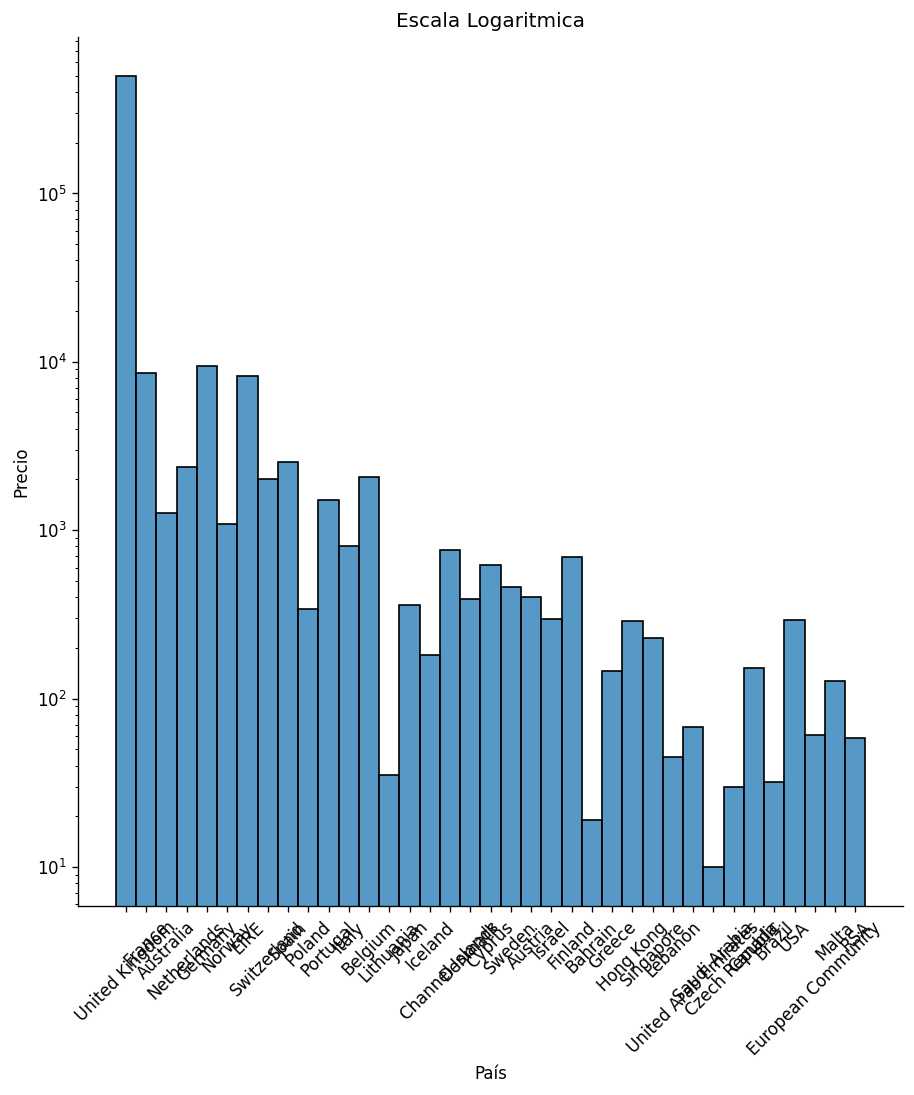

In [18]:
# Matplotlib usa todo el ancho de pantalla:
plt.rcParams.update({'figure.figsize': (10, 8), 'figure.dpi': 120})
figure = sns.displot(data=df, x='Country', height=8 ) 
plt.title("Escala Logaritmica")
plt.xlabel("País")
plt.ylabel("Precio")
plt.yscale('log')
plt.xticks(rotation=45)

In [ ]:
#Pairplot del dataset!
sns.pairplot(df)

In [ ]:
# Mapa de correlaciones
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True)

In [ ]:
titles=' '.join(data_filt.title).lower()
plt.figure(figsize=(15,10))
wordcloud = WordCloud(collocations=True, max_words=500 ).generate(titles)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

2. Construir un mapa que muestre número de compras totales por país y otro con número de compras relativas (per capita) por país.

![](mapa.png)

In [9]:
# Lee los datos de los límites de los países
paises_geo_pandas = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Ver el listado completo
pd.set_option('display.max_rows', 200)
paises_geo_pandas.name.sort_values

<bound method Series.sort_values of 0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
5                    Kazakhstan
6                    Uzbekistan
7              Papua New Guinea
8                     Indonesia
9                     Argentina
10                        Chile
11              Dem. Rep. Congo
12                      Somalia
13                        Kenya
14                        Sudan
15                         Chad
16                        Haiti
17               Dominican Rep.
18                       Russia
19                      Bahamas
20                 Falkland Is.
21                       Norway
22                    Greenland
23       Fr. S. Antarctic Lands
24                  Timor-Leste
25                 South Africa
26                      Lesotho
27                       Mexico
28                      Uruguay
29                       Brazil
30  

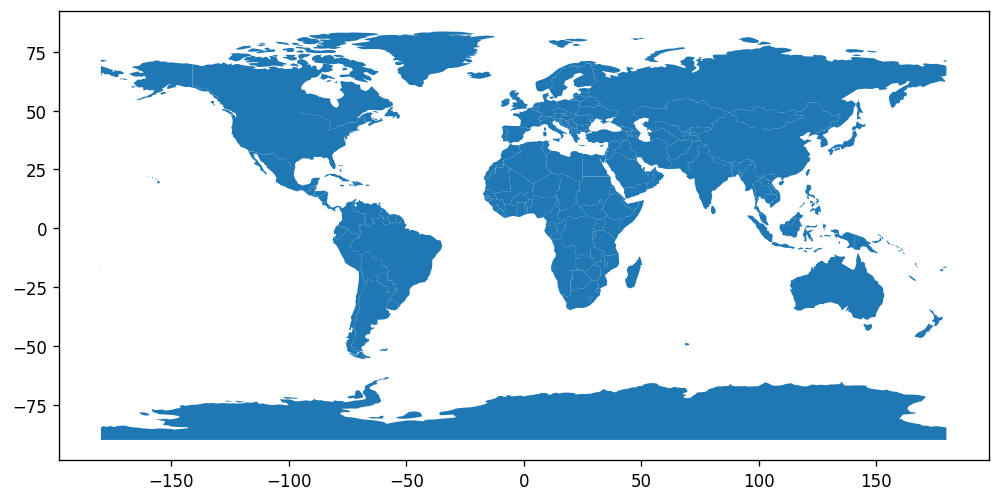

In [10]:
# Verificar si coincide losnombre d elos países del data frame con los del geopandas
#paises_geo_pandas.loc[paises_geo_pandas["name"]=="Iceland"]
# Crea una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))
# Dibuja los países en el mapa
paises_geo_pandas.plot(ax=ax)
# Muestra el mapa
plt.show()   

In [ ]:
# Unir los datos de los países con los datos de ventas por país
df = paises_geo_pandas.merge(ventas, left_on='name', right_on='Country')
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))
# Dibujar los países en el mapa y colorearlos según las ventas
df.plot(ax=ax, column='Quantity', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)
# Añadir un título al mapa
ax.set_title('Ventas por país')    plt.yscale('log')
plt.yscale('log')
plt.show()

3. Analizar los horarios y calendarios de compra, mediante histogramas y estacionalidad.
![](ventas-por-meses.png)
![](pieChart.png)

In [22]:
ventas_otros_paises = pd.read_csv("otros_paises.csv")

In [23]:
# Eliminamos colunmas innecesarias
ventas_otros_paises = ventas_otros_paises.drop(['InvoiceNo', 'StockCode', 'Description','CustomerID'], axis=1)
# Verificamos que no esten las columnas eliminadas
ventas_otros_paises.columns

Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'Country'], dtype='object')

In [24]:
ventas_otros_paises.sort_values(by=['Country','InvoiceDate','UnitPrice'])

,Quantity,InvoiceDate,UnitPrice,Country
3138,96,1/10/2011 9:58,0.85,Australia
3218,20,1/11/2011 9:47,0.85,Australia
3228,12,1/11/2011 9:47,0.85,Australia
3224,12,1/11/2011 9:47,1.25,Australia
3225,12,1/11/2011 9:47,1.45,Australia
...,...,...,...,...
27604,12,9/1/2011 17:45,12.75,United Arab Emirates
27600,6,9/1/2011 17:45,14.95,United Arab Emirates
27601,6,9/1/2011 17:45,14.95,United Arab Emirates
27602,6,9/1/2011 17:45,14.95,United Arab Emirates


In [25]:
# Convertir la columna "fecha_hora" a formato de fecha y hora
ventas_otros_paises['InvoiceDate'] = pd.to_datetime(ventas_otros_paises['InvoiceDate'])
# Separar la fecha y los minutos/segundos en columnas separadas
ventas_otros_paises['fecha'] = ventas_otros_paises['InvoiceDate'].dt.date
ventas_otros_paises['minutos_segundos'] = ventas_otros_paises['InvoiceDate'].dt.time
ventas_otros_paises


,Quantity,InvoiceDate,UnitPrice,Country,fecha,minutos_segundos
0,24,2010-12-01 08:45:00,3.75,France,2010-12-01,08:45:00
1,24,2010-12-01 08:45:00,3.75,France,2010-12-01,08:45:00
2,12,2010-12-01 08:45:00,3.75,France,2010-12-01,08:45:00
3,12,2010-12-01 08:45:00,0.85,France,2010-12-01,08:45:00
4,24,2010-12-01 08:45:00,0.65,France,2010-12-01,08:45:00
...,...,...,...,...,...,...
45980,12,2011-12-09 12:50:00,0.85,France,2011-12-09,12:50:00
45981,6,2011-12-09 12:50:00,2.10,France,2011-12-09,12:50:00
45982,4,2011-12-09 12:50:00,4.15,France,2011-12-09,12:50:00
45983,4,2011-12-09 12:50:00,4.15,France,2011-12-09,12:50:00


In [26]:
ventas_otros_paises = ventas_otros_paises.drop(['InvoiceDate', 'minutos_segundos'], axis=1)
ventas_otros_paises.head(3)

,Quantity,UnitPrice,Country,fecha
0,24,3.75,France,2010-12-01
1,24,3.75,France,2010-12-01
2,12,3.75,France,2010-12-01


In [ ]:
# Agrupar por fecha y país y calcular la suma de los valores
df_agrupado = ventas_otros_paises.groupby(['Country'])['UnitPrice'].sum()
prueba_2 = pd.read_csv('otros_paises.csv', parse_dates=['InvoiceDate'], index_col='InvoiceDate')
# Agrupar por fecha y país y calcular la suma de los valores
df_agrupado = df_parseado.groupby(['InvoiceDate', 'Country'])['UnitPrice'].sum()
emissions = emissions.groupby(by="year").sum()

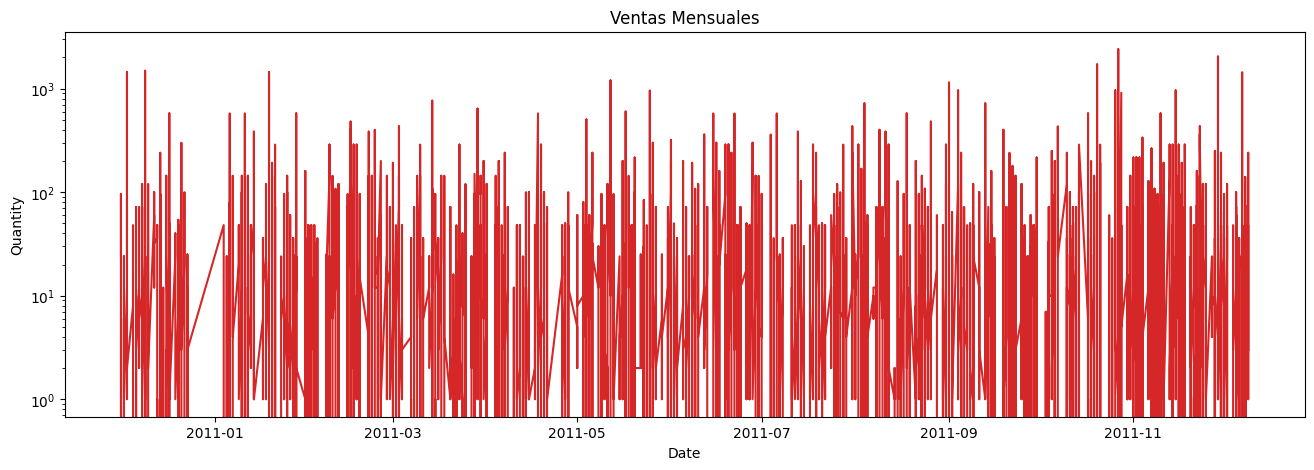

In [30]:
# Ploteamos
def plot_df(ventas_otros_paises, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    #plt.yscale('log')
    plt.show()
plot_df(ventas_otros_paises, x=ventas_otros_paises.fecha, y=ventas_otros_paises.Quantity, title='Ventas Mensuales')

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))
# Dibujar los países en el mapa y colorearlos según las ventas
ventas_otros_paises.plot(ax=ax, column='Quantity', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)
# Añadir un título al mapa
ax.set_title('Ventas por país')
plt.show()

In [ ]:
# Unir los datos de los países con los datos de ventas por país
df = paises_geo_pandas.merge(ventas, left_on='name', right_on='Country')
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))
# Dibujar los países en el mapa y colorearlos según las ventas
df.plot(ax=ax, column='Quantity', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)
# Añadir un título al mapa
ax.set_title('Ventas por país')    
plt.yscale('log')
plt.show()

4. Crear la **Customer-Item Matrix** mediante el método df.pivot_table

![](pivot-table.png)

5. Crear la **User to User Similarity Matrix** mediante la **distancia del coseno** con la librería sklearn

![](An-example-of-user-similarity-matrix-of-k-RRI.png)

6. Obtener las 10 recomendaciones de tipo **filtrado colaborativo por usuario**.

7. Obtener las 10 recomendaciones de tipo **filtrado colaborativo por producto** creando previamente la **Item to Item Similarity Matrix**.

8. Obtener las 10 recomendaciones de tipo **basado en contenido** utilizando métricas de texto (Levenshtein o vectorización TF-IDF)

9. Realizar un **market basket analysis** para detectar **bundles** (packs) de productos. Algoritmos de clusterización como K-means podrían detectar los bundles más frecuentes.